<a href="https://colab.research.google.com/github/DanielRaiicHu/precio_de_inmuebles_regresion_lineal/blob/main/precios_de_inmuebles_regresion_lineal.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Leyendo los datos
datos = pd.read_csv("/content/drive/MyDrive/regresion_lineal/precios_casas.csv")
datos.head()


,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [ ]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [ ]:
# Eliminamos la columna de Id, porque es un número único y no lo vamos a utilizar
# Este dato no nos servirá para nuestro modelado
datos = datos.drop(columns='Id')

# Para asegurarnos que eliminamos la culumna
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [ ]:
# Correlación

# Calculamos la matriz de correlación de todas las columnas numéricas del DataFrame 'datos'
# Esto nos permite ver qué tan relacionadas están entre sí las variables numéricas
corr = datos.corr()

In [ ]:
# Extraemos la columna de correlaciones respecto a 'precio_de_venta'
# Así sabremos qué variables tienen mayor o menor influencia en el precio
corr['precio_de_venta']

,precio_de_venta
area_primer_piso,0.616557
tiene_segundo_piso,0.138541
area_segundo_piso,0.305311
cantidad_banos,0.563132
capacidad_carros_garage,0.640214
calidad_de_cocina_excelente,0.496223
precio_de_venta,1.000000


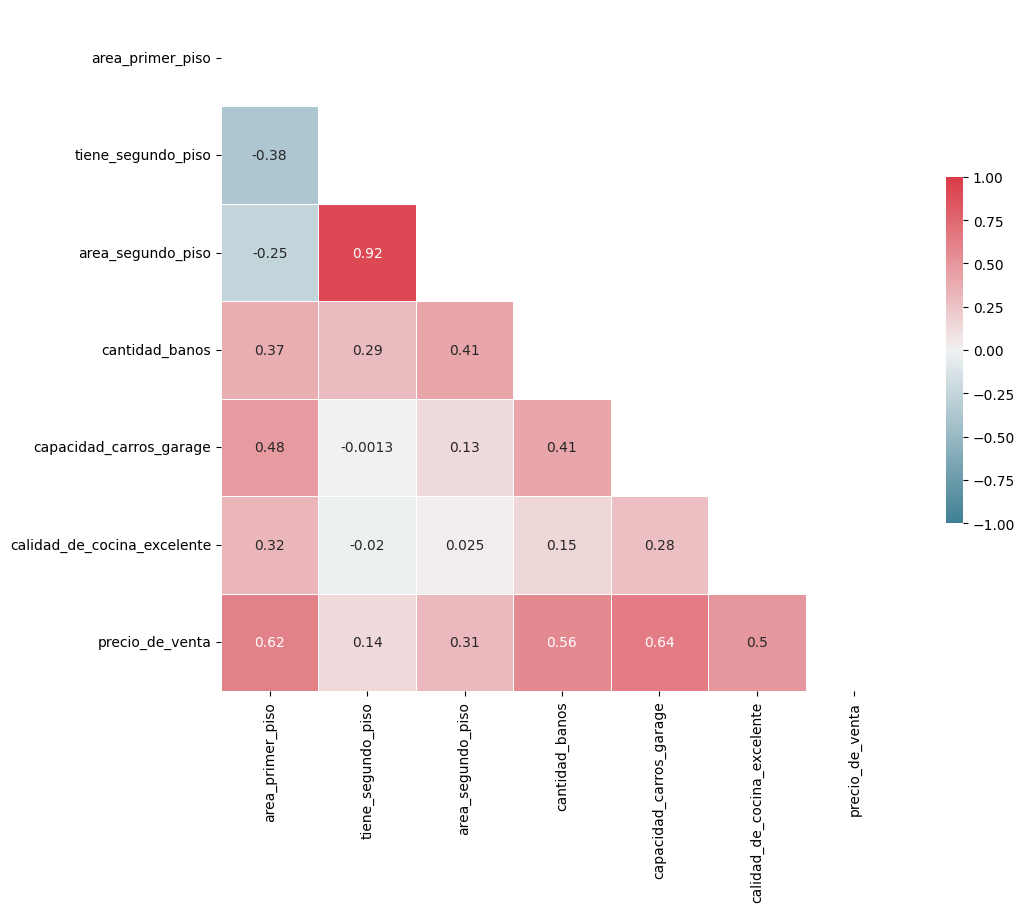

In [ ]:
# Actividad
# Cuáles factores están más correlacionados?

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

**Para analizar la correlación:**

* Intensidad: se refiere a la fuerza de la relación entre las variables medidas. Puede variar de -1 a +1, donde -1 indica una correlación perfectamente negativa, +1 indica una correlación perfectamente positiva y 0 indica ausencia de correlación lineal.

* Dirección: se refiere a la naturaleza de la relación entre las variables medidas. Una correlación positiva indica que las variables aumentan o disminuyen juntas, mientras que una correlación negativa indica que una variable aumenta mientras la otra disminuye, o viceversa.

**Ejemplo:**

El coeficiente de correlación lineal entre el área del primer piso y el precio de venta es de 0.62, indicando una correlación positiva moderadamente fuerte (intensidad). En general, a medida que el área del primer piso de una casa aumenta, el precio de venta también tiende a aumentar (dirección).

>* La correlación entre la capacidad de coches en la garaje y el área del primer piso es 0.48 moderadamente positiva, indicando que, en general, a medida que la capacidad de coches en la garaje aumenta, el área del primer piso de la casa tiende a aumentar también.

>* Entre garaje para coches y cantidad de baños es moderadamente positiva (0.409281), indicando que, en general, a medida que la capacidad de la garaje aumenta, el número de baños también tiende a aumentar. Esto sugiere una posible asociación entre el espacio para estacionamiento de vehículos y el tamaño de la residencia.

>* Cuando miramos la correlación entre el área del primer piso y el área del segundo piso, verificamos que es débil y negativa (-0.25). Esto sugiere que, en general, cuando el área del primer piso de una casa aumenta, el área del segundo piso tiende a disminuir un poco, y viceversa. Esta relación indica una posible compensación entre las áreas de los dos pisos, pero no es una relación muy fuerte y puede variar entre diferentes propiedades.

**Observación:** Es importante notar que la correlación no implica causalidad; es decir, no podemos afirmar que el aumento en el precio de venta es causado específicamente por el aumento en el área del primer piso solo con el uso de la correlación, sino que estos factores están relacionados entre sí.

## Relacionando variables

In [ ]:
# importando los paquetes para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

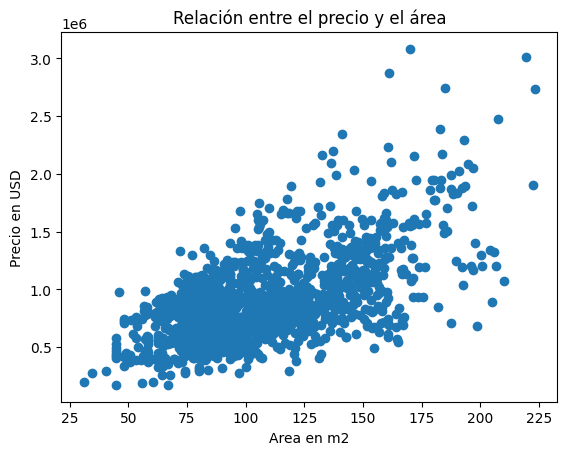

In [ ]:
# Cómo se relacionan el área construída y el precio del inmueble?
plt.scatter(datos['area_primer_piso'],datos['precio_de_venta']) #ejes x,y
plt.title('Relación entre el precio y el área')
plt.xlabel('Area en m2')
plt.ylabel('Precio en USD')
plt.show()

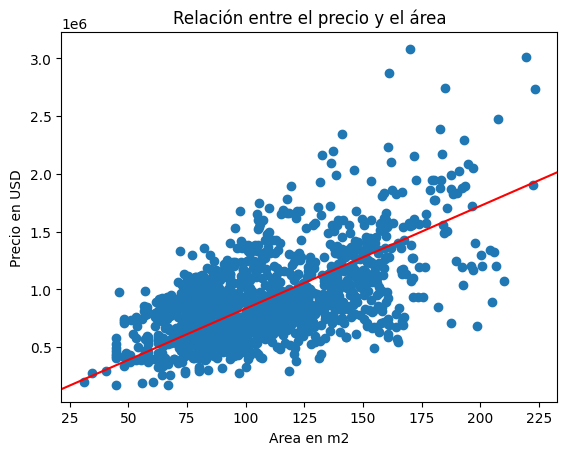

In [ ]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?

# Hacemos una recta al ojo

# Creamos un gráfico de dispersión (scatter plot) para observar la relación entre el área del primer piso y el precio de venta
plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])  # Eje x: área en m², Eje y: precio en USD

# Dibujamos una línea recta "a ojo" (sin cálculo estadístico), usando dos puntos de referencia
# Esta línea representa una estimación visual de la tendencia
plt.axline(xy1=(40, 300000), xy2=(175, 1500000), color='red')

# Agregamos un título al gráfico
plt.title('Relación entre el precio y el área')

# Etiquetamos el eje X (área en metros cuadrados)
plt.xlabel('Area en m2')

# Etiquetamos el eje Y (precio en dólares)
plt.ylabel('Precio en USD')

# Mostramos el gráfico
plt.show()

# A medida que aumenta el área, también aumenta el precio

## Mejor recta

In [ ]:
# Cuál es la recta que mejor se ajusta a esta relación

# Creamos un gráfico de dispersión interactivo con Plotly Express
# Eje X: 'area_primer_piso', Eje Y: 'precio_de_venta'
# trendline='ols' → agrega una línea de tendencia basada en regresión lineal (OLS: Mínimos Cuadrados Ordinarios)
# trendline_color_override='red' → la línea de tendencia se dibuja en color rojo
px.scatter(datos, x='area_primer_piso',y='precio_de_venta',trendline_color_override='red',trendline='ols')

**En esta clase, aprendiste a:**

>* Obtener el coeficiente de correlación de los datos;
>* Analizar la intensidad y la dirección de la correlación entre dos variables;
>* Identificar la linealidad en el gráfico de dispersión;
>* Diferenciar la variable explicativa de la variable respuesta;
>* Visualizar la mejor línea utilizando Plotly.

# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

In [ ]:
# x: área de la casa
# y: precio de la casa

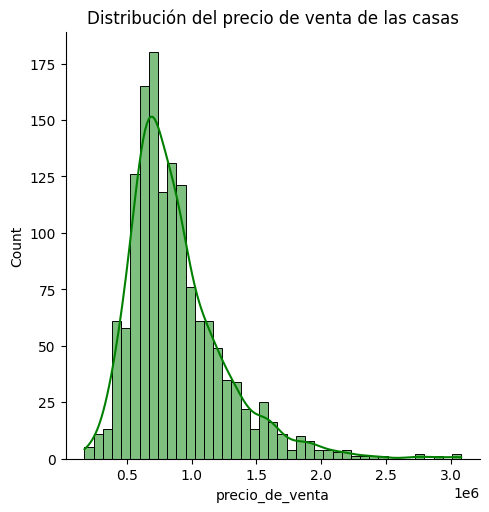

In [ ]:
#Quién es nuestra variable de respuesta?

# Creamos una gráfica de distribución (histograma) con seaborn
# kde=True → agrega la curva de densidad (estimación de la función de probabilidad)
# color='green' → define el color del histograma y la curva de densidad
sns.displot(datos['precio_de_venta'], kde=True, color='green')

# Agregamos un título al gráfico
plt.title('Distribución del precio de venta de las casas')

# Mostramos el gráfico
plt.show()

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

Dividir el conjunto de datos en conjuntos de entrenamiento y prueba es una práctica esencial en machine learning para evaluar la capacidad de generalización del modelo. El conjunto de entrenamiento se usa para entrenar el modelo, mientras que el conjunto de prueba se mantiene separado y se usa para evaluar el desempeño del modelo en datos no vistos, simulando cómo se comportaría el modelo al ser aplicado en situaciones reales.

In [ ]:
# import train_test_split
# Este método es usado para dividir un dataset en dos partes:
# Datos de entrenamiento (train) → para construir el modelo.
# Datos de prueba (test) → para evaluar el rendimiento del modelo con datos nunca antes vistos.
from sklearn.model_selection import train_test_split

# Definimos la variable objetivo (target) que queremos predecir
y = datos['precio_de_venta']  # Precio de venta de los inmuebles

# Definimos las variables predictoras (features), eliminando la columna objetivo del DataFrame
X = datos.drop(columns='precio_de_venta')  # Todas las demás columnas serán usadas para predecir

# Dividimos los datos en conjuntos de entrenamiento (70%) y prueba (30%)
# random_state=230 asegura que la división sea siempre la misma si se vuelve a ejecutar el código
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)

In [ ]:
# Datos de entrenamiento para usar la fórmula

# Creamos un nuevo DataFrame a partir de las variables predictoras del conjunto de entrenamiento
df_train = pd.DataFrame(X_train)

# Agregamos la columna objetivo (precio de venta) al DataFrame de entrenamiento
# Esto nos permite tener nuevamente un conjunto completo para análisis exploratorio o modelado posterior
df_train['precio_de_venta'] = y_train

In [ ]:
# import ols
# Importamos la función ols (Ordinary Least Squares) desde statsmodels
# Esta función permite ajustar un modelo de regresión lineal usando fórmulas tipo 'Y ~ X1 + X2'
from statsmodels.formula.api import ols

In [ ]:
# Ajustando el primer modelo
# Creamos un modelo de regresión lineal simple para predecir el precio de venta
# con base en el área del primer piso (area_primer_piso)
# Creamos un modelo de regresión lineal simple donde:
# 'precio_de_venta' es la variable dependiente (objetivo)
# 'area_primer_piso' es la única variable independiente (predictora)
# El modelo se ajusta (fit) utilizando los datos del DataFrame de entrenamiento
modelo_0 = ols('precio_de_venta ~ area_primer_piso',data=df_train).fit() # precio_de_venta con respecto a area_primer_piso

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [ ]:
# visualizando los parámetros
# Mostramos los coeficientes del modelo: el intercepto y la pendiente respecto al área
modelo_0.params
# Para nuestro ejemplo, la únidad es dólares

,0
Intercept,152909.288334
area_primer_piso,6793.641641


>* Según el modelo, el precio base de una propiedad sería $152.909 incluso si el área del primer piso fuera 0 m².
>
>* Pero ¡ojo!: esto no significa que realmente se venda una casa sin área construida, sino que es una proyección matemática que sirve para ajustar la recta.

In [ ]:
# El resumen del modelo

# Mostramos el resumen estadístico completo del modelo de regresión
# Incluye métricas como R², coeficientes, errores estándar, p-valores y más
print(modelo_0.summary())

# Con el resultado vemos que tiene un desvio estándar de 275.455 para más o para menos

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Tue, 29 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        05:39:32   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [ ]:
# Observamos el R² del modelo ajustado
# Donde 1 indica un ajuste perfecto y 0 indica que el modelo no explica nada

# Este valor se calcula utilizando los datos de entrenamiento
# Evalúa qué tan bien se ajusta el modelo a los datos con los que fue entrenado.
round(modelo_0.rsquared,2)

# Resultado: 0.37728010994297867

# Interpretación:
# El área del primer piso explica aproximadamente el 37.7% de la variación del precio de la casa.
# Por lo tanto, alrededor del 62.3% de esa variación depende de otros factores no incluidos en el modelo.

np.float64(0.38)

## Entendiendo el resíduo

In [ ]:
# Quiénes son los residuos?

# Mostramos los residuos del modelo, también llamados errores residuales
# Cada residuo representa la diferencia entre el valor real observado y el valor estimado por el modelo para una observación
# Es decir, muestra los errores individuales del modelo para cada dato del conjunto de entrenamiento
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


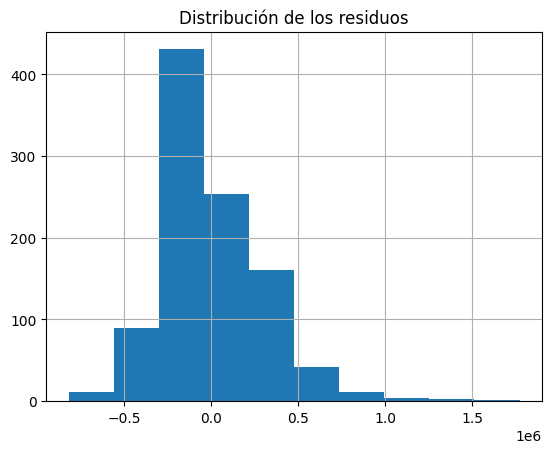

In [ ]:
# Cómo están distribuidos
# Visualizamos cómo se distribuyen los residuos del modelo (errores individuales)
modelo_0.resid.hist()
plt.title('Distribución de los residuos')
plt.show()

**Interpretación del gráfico resultante de arriba**

* La mayoría de los residuos se agrupan cerca de 0, lo que en principio es esperado, pero no necesariamente positivo por sí solo.

Lo ideal sería que:

* La mayoría de los residuos estén muy cercanos a 0, con poca dispersión.

* La distribución de los residuos sea simétrica y con forma aproximadamente normal (campana).

* Haya pocos valores extremos (outliers) a ambos lados.

<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [ ]:
# definiendo la 'Y' prevista
y_predict = modelo_0.predict(X_test)

In [ ]:
# Importamos la función r2_score desde sklearn para calcular el R²
from sklearn.metrics import r2_score

El coeficiente de determinación R² para el modelo con los datos de prueba es de:  0.39


In [ ]:
# mostrando el resultado de r²
# Este valor se calcula utilizando los datos de prueba.
# Evalúa qué tan bien generaliza el modelo a datos que no ha visto durante el entrenamiento.
# Proporciona una evaluación más realista del rendimiento del modelo, midiendo su capacidad para predecir valores en datos nuevos.
print(f'El coeficiente de determinación R² para el modelo con los datos de prueba es de:  {round(r2_score(y_test, y_predict),2)}')

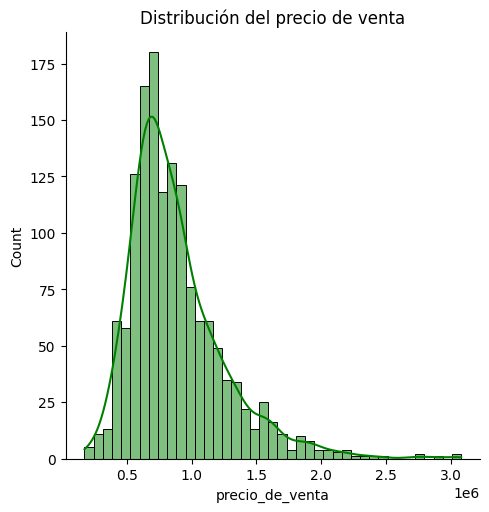

In [ ]:
# Histograma como recurso visual para facilitar este análisis.
sns.displot(datos['precio_de_venta'], kde=True, color='green')
plt.title('Distribución del precio de venta')
plt.show()

>* Al ejecutar, pudimos identificar una asimetría en los datos. Tenemos algunos inmuebles cuyo precio de venta está lejos del comportamiento mediano, es decir, la presencia de valores muy altos sugiere la existencia de propiedades de alto valor, en comparación con la mayoría de las otras propiedades en el conjunto de datos.
>
>* Vale la pena señalar que identificar simetría en la distribución de la variable respuesta puede facilitar la interpretación de los resultados, ya que los valores extremos pueden influir en el análisis y las decisiones tomadas con base en el modelo de regresión lineal.

En esta clase, aprendiste a:
* Dividir la base de datos para entrenar y probar el modelo;
* Interpretar los coeficientes de regresión lineal simple;
* Calcular e interpretar el coeficiente de determinación R²;
* Analizar cuánto se desvía cada punto de datos de la línea de regresión ajustada a través de los residuos;
* Comprender qué tan bien se ajustan los valores observados al modelo de regresión con R²;
* Calcular el R² en el conjunto de prueba.

# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

In [ ]:
# cuáles otras características podrían explicar el precio de los inmuebles?


In [ ]:
#Vamos a analizar solamente y_vars='precio_de_venta'


## Añadiendo factores al modelo

In [ ]:
# importando la api de statsmodels


In [ ]:
# Añadiendo una constante


In [ ]:
# Creando el modelo de regresión (con todas las variables): saturado


In [ ]:
# Modelo sin el área del segundo piso


In [ ]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso


In [ ]:
# Resumen del modelos


## Comparando los modelos
Cuál es el modelo?


In [ ]:
# Cuántos parámetros tiene el modelo?


# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [ ]:
# Añadiendo una constante en X_test


In [ ]:
# Previsión con el modelo 3


In [ ]:
# Cuál es el r² de la previsión?


In [ ]:
# Cuál es el R² del entrenamiento?


## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [ ]:
#Nuevo inmueble


In [ ]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?


In [ ]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [ ]:
# Leyendo varias casas?


In [ ]:
# Añadiendo una constante


In [ ]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()


# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [ ]:
# importar el VIF de statsmodel


In [ ]:
# VIF 1


In [ ]:
# VIF 3


## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">